EDA Final Project
    The goal of this project is to clean up multiple datasets to analyze the information to better understand (with the help of vizuals) the shopping habits of the customers. 
    First we will read and break down the data, start to organize organize and begin to examine the data. Next, we will start adressing any missing or dulicate values which can skew our results. Then, we further analyze the data. This is when we will start answering specific questions and really start understanding the data in front of us.
Heather Marie Culligan
11/03/2024

In [212]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import all needed software libraries

In [213]:
order= pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products= pd.read_csv('/datasets/products.csv', sep=';')
order_products= pd.read_csv('/datasets/order_products.csv', sep=';')
aisles= pd.read_csv('/datasets/aisles.csv', sep=';')
departments= pd.read_csv('/datasets/departments.csv', sep=';')

#read all datasets and label the dataframes accordingly

In [214]:
order.info()
#using info helps us verify the columns are in the correct format. as we see the ID columns are int64.
#it also quickly shows we have missing info in a column to address later. (repeat for each dataset).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [215]:
order.head()
#using head and/or tail gives us a quick glance of how the data set is currently looking. for me it helps me visualize what 
#I am doing to what column down the line. (repeat for each dataset).

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [216]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [217]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [218]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [219]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [220]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [221]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [222]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [223]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


The datasets above will give us all of the information needed throughout this project. We can see from the datasets above, there are missing values to be addressed later in three of the five datsets.
The biggest of the datasets has over 4 million entries, while the smallest has only 21. 
Utilizing all the datasets together can provide a lot of information.  

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [224]:
# Check for duplicated orders
duplicate_orders= order.duplicated()
duplicate_orders.sum()
#above used duplicated to find duplicates in the whole dataset

15

In [225]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_2am_orders= order[(order['order_dow']==3) & (order['order_hour_of_day']==2)]
wednesday_2am_orders
#looks like 121 orders were placed at 2am on wednesday (based on amount of rows found below)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [226]:
# Remove duplicate orders
dup_orders= duplicate_orders.drop_duplicates() 
#using drop.duplicate to remove duplicates in the dataset

In [227]:
# Double check for duplicate rows
duplicate_orders= dup_orders.duplicated()
duplicate_orders.sum()
#recheck :)

0

In [228]:
# Double check for duplicate order IDs only
order.duplicated(subset = ['order_id']).sum()
#orignial dataset to locate the duplicates to the 'order_id' column

15

Under the 'order' dataset, we have checked for duplicated values, then addressed them and then went back to double check they have all been removed from the dataset. 

### `products` data frame

In [229]:
# Check for fully duplicate rows
duplicate_products= products.duplicated()
duplicate_products.sum()

0

In [230]:
# Check for just duplicate product IDs
products.duplicated(subset = ['product_id']).sum()

0

In [231]:
# Check for just duplicate product names (convert names to lowercase to compare better)
duplicate_products= products['product_name'].str.lower()
duplicate_products.duplicated().sum()
#making sure the set is lowercase after making sure it is read as a string as it was previously read as an object

1361

In [232]:
# Check for duplicate product names that aren't missing
products['product_name'].duplicated(keep=False).dropna().sum()
#getting the sum of duplicates

1258

Under the 'products' datset we checked for duplicate rows, specifically duplicate product IDs, specifically finding the sum duplicate product names (in lowercase to cover our bases) and finally the sum of duplicate product names, excluding missing values. 

### `departments` data frame

In [233]:
duplicate_departments= departments.duplicated()
duplicate_departments.sum() # this verifies there are no duplicate values

0

In [234]:
departments.isna().sum() #this verifies there are no missing values

department_id    0
department       0
dtype: int64

We see above that the 'departments' dataset is free of duplicates and missing values. 

### `aisles` data frame

In [235]:
duplicate_aisles= aisles.duplicated()
duplicate_aisles.sum() #this verifies there are no duplicate values

0

In [236]:
aisles.isna().sum() #this verifies there are no missing values

aisle_id    0
aisle       0
dtype: int64

We see above that the 'aisles' dataset is free of duplicates and missing values. 

### `order_products` data frame

In [237]:
# Check for fullly duplicate rows
duplicate_order_products= order_products.duplicated()
duplicate_order_products.sum()

0

In [238]:
# Double check for any other tricky duplicates
order_products.duplicated(subset = ['order_id', 'product_id']).sum()

0

Under the 'order_products' dataset we check the whole dataset for duplicates and double check for duplicates that are harder to find.

## Find and remove missing values


### `products` data frame

In [239]:
products.isna().sum() #we see there is 1258 missing values in 'product_name'. 
#This tells us there is extra steps to take to address these missing values.

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [240]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names= products[products['product_name'].isna()]

if(missing_product_names['aisle_id']==100).all():
    print('Yes, all the missing products are associated with aisle ID 100.')
else:
    print('No, not all the missing products are associated with aisle ID 100.')

Yes, all the missing products are associated with aisle ID 100.


In [241]:
# Are all of the missing product names associated with department ID 21?
if(missing_product_names['department_id']==21).all():
    print('Yes, all the missing products are associated with department ID 21.')
else:
    print('No, not all the missing products are associated with department ID 21.')

Yes, all the missing products are associated with department ID 21.


In [242]:
# What is this ailse and department?
print(aisles['aisle'][99])
print()
print(departments['department'][20]) #using print here for spacing and to print both answers in one cell

missing

missing


In [243]:
products['product_name'] = products['product_name'].fillna('Unknown')

Under the 'products' dataset we see there are 1258 missing values, all withing the 'product_name' column. With further investigation all the missing values are all from the same aisle withing the same department. We also learn that we do not even know what aisle or Department it is supposed to be as those values are missing also. We then fill any empty values in the 'product_name' column with "Unknown". 

### `orders` data frame

In [244]:
order.isna().sum() #we see there is 28819 missing values in 'days_since_prior_order'.
#This tells us there is extra steps to take to address these missing values.

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [245]:
# Are there any missing values where it's not a customer's first order?
missing_orders= order.iloc[:2].isna().all()
if(missing_orders >=1).all():
    print("Yes, there are missing values where it is not a customer's first order." )
else:
    print("No, there are not missing values where it is not a customer's first order.")

No, there are not missing values where it is not a customer's first order.


Under the dataset 'order' again, we see there are 28819 missing values all in the 'days_since_prior_order' column. 
We also observe all the missing values are found in the customers first order. 

### `order_products` data frame

In [246]:
order_products.isna().sum() # we see there is 836 missing values in 'add_to_cart_order'. 
#This tells us there is extra steps to take to address these missing values.

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [247]:
# What are the min and max values in this column?
order_products['add_to_cart_order'].describe()
#assuming "this column" refers to the column with missing values the min would be 1.000000e+00 and the max would be 6.400000e+01

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

In [248]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
id_missing_carts= order_products[order_products['add_to_cart_order'].isna()]['order_id']

In [249]:
# Do all orders with missing values have more than 64 products?
orders_by_size= order_products.iloc[:0].isna()
orders_over_64= orders_by_size[orders_by_size >64].sum()

In [250]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('Int64', errors='ignore')

Under the 'order_products' dataset again, we see there is 836 missing values in the 'add_to_cart_order' column. We then use describe() to see the min and max values within the column. 
We then see how many orders with missing values have over 64 items. Finally, we replace missing values for the set. 

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [251]:
order_hour_of_day= order['order_hour_of_day']
if((order_hour_of_day >=0) & (order_hour_of_day <=23)).all():
    print('Yes, the order hour of the day range is reasonable.')
else:
    print('No, the order hour of the day range is not reasonable.')

Yes, the order hour of the day range is reasonable.


In [252]:
order_dow= order['order_hour_of_day']
if((order_dow >=0) & (order_hour_of_day <=6)).all():
    print('Yes, the order day of the week range is reasonable.')
else:
    print('No, the order day of the week range is not reasonable.')

No, the order day of the week range is not reasonable.


### [A2] What time of day do people shop for groceries?

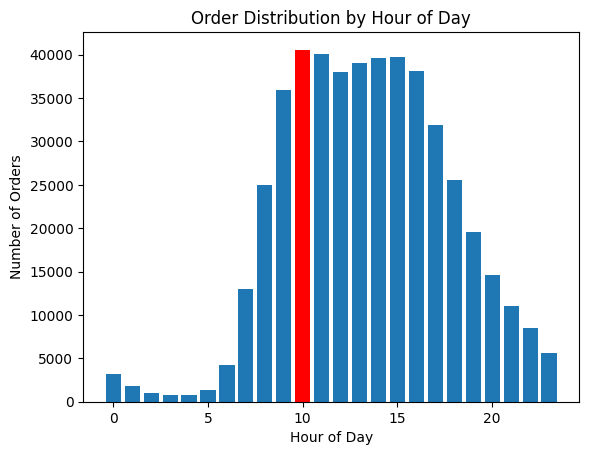

In [253]:
orders_by_hour = order['order_hour_of_day'].value_counts()

busiest_hour = orders_by_hour.idxmax()

plt.bar(orders_by_hour.index, orders_by_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Order Distribution by Hour of Day')
plt.bar(busiest_hour, orders_by_hour[busiest_hour], color='red')
plt.show()

### [A3] What day of the week do people shop for groceries?

In [254]:
days_of_week= { 0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

In [255]:
most_common_day_number= order['order_dow'].value_counts().idxmax()
most_common_day= days_of_week[most_common_day_number]
(f"The most common shopping day is: {most_common_day}")

'The most common shopping day is: Sunday'

Looks like most people do their shopping on Sundays. 

### [A4] How long do people wait until placing another order?

In [256]:
days_between_orders= order['days_since_prior_order'].value_counts().idxmax()

In [257]:
f"Typically, customers wait {days_between_orders} days before placing another order."

'Typically, customers wait 30.0 days before placing another order.'



# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

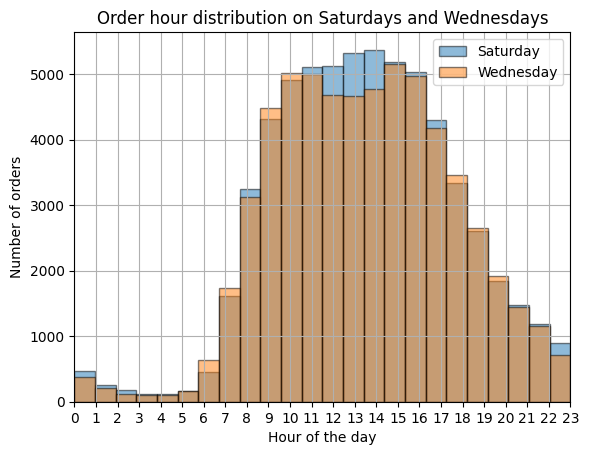

In [258]:
saturday_orders= order[order['order_dow'] ==6]
wednesday_orders = order[order['order_dow'] == 3]

saturday_orders['order_hour_of_day'].hist(edgecolor='black', label='Saturday', alpha=0.5, bins=24)
wednesday_orders['order_hour_of_day'].hist(edgecolor='black', label='Wednesday', alpha= 0.5, bins=24)
plt.title('Order hour distribution on Saturdays and Wednesdays')
plt.xlim(left=0, right=23)
plt.ylim(bottom=0)
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.xticks(np.arange(0,24,1))
plt.legend(['Saturday','Wednesday']) 
plt.show()

The graphs are fairly the same, but it appears Saturday is buiser between 1100 and 1400, although Wednesday is slightly busier at 0600 and 0900. For the most part they follow the same curve. The buisest times for both days are within the hours of 1000 and 1500. Saturday has the busiest time at 1400 while Wednesday has the busiest time of 1500. 

### [B2] What's the distribution for the number of orders per customer?

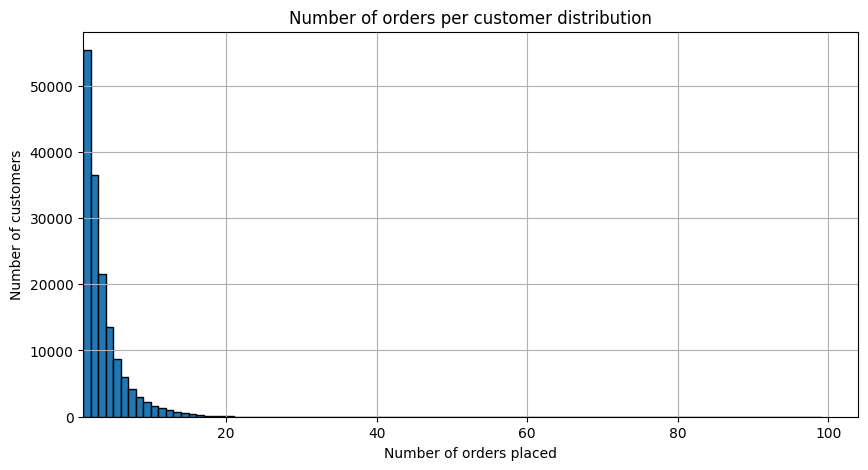

In [259]:
orders_per_customer= order.groupby('user_id')['order_id'].count().reset_index()
orders_per_customer.columns= ['user_id', 'order_id']

plt.figure(figsize=(10,5))
bins= range(100)

orders_per_customer['order_id'].hist(bins=bins, edgecolor='black')

plt.title('Number of orders per customer distribution')
plt.xlabel('Number of orders placed')
plt.ylabel('Number of customers')
plt.xlim(left=1)
plt.ylim(bottom=0)
plt.show()

Above we see not many customers reorder (especially more than once or twice).

### [B3] What are the top 20 popular products (display their id and name)?

In [260]:
prodor_df= pd.merge(products, order_products, on='product_id')

In [261]:
top_products= prodor_df.groupby(['product_id', 'product_name'])['add_to_cart_order'].sum().reset_index().nlargest(20, 'add_to_cart_order')
top_products

,product_id,product_name,add_to_cart_order
22808,24852,Banana,321962
12025,13176,Bag of Organic Bananas,271774
19370,21137,Organic Strawberries,268494
20077,21903,Organic Baby Spinach,254234
43271,47209,Organic Hass Avocado,201977
43663,47626,Large Lemon,171731
24047,26209,Limes,170864
43788,47766,Organic Avocado,160678
15364,16797,Strawberries,141625
25666,27966,Organic Raspberries,138046


Above we see the top 20 products sold, most of which are fresh fruit or veggies. 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [262]:
top_products_reordered= prodor_df.groupby(['product_id', 'product_name'])['reordered'].sum().reset_index().nlargest(20, 'reordered')
top_products_reordered

,product_id,product_name,reordered
22808,24852,Banana,55763
12025,13176,Bag of Organic Bananas,44450
19370,21137,Organic Strawberries,28639
20077,21903,Organic Baby Spinach,26233
43271,47209,Organic Hass Avocado,23629
43788,47766,Organic Avocado,18743
25556,27845,Organic Whole Milk,16251
43663,47626,Large Lemon,15044
25666,27966,Organic Raspberries,14748
15364,16797,Strawberries,13945


There appears to be a decent overlap in the top 20 sold products and the top 20 reordered, which makes logical sense, the more it is reordered, the more it is sold. 

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [263]:
first_item_added= prodor_df[prodor_df['add_to_cart_order']==1]
top_products_first_added= first_item_added.groupby(['product_id', 'product_name'])['add_to_cart_order'].sum().reset_index().nlargest(20, 'add_to_cart_order')
top_products_first_added

,product_id,product_name,add_to_cart_order
13414,24852,Banana,15562
7127,13176,Bag of Organic Bananas,11026
15028,27845,Organic Whole Milk,4363
11384,21137,Organic Strawberries,3946
25439,47209,Organic Hass Avocado,3390
11786,21903,Organic Baby Spinach,3336
25732,47766,Organic Avocado,3044
10622,19660,Spring Water,2336
9050,16797,Strawberries,2308
15102,27966,Organic Raspberries,2024


Looks like the majority of items first placed in the cart is from the fresh produce section. 

We have successfully reviewed and analyzed the data from Instacart orders. We now better understand the trends of the orders placed by customers. Most customers shop on Sundays, and the busiest time of day is 1000! 